# Imports

In [9]:
## Suppress warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import pickle

## Notebook display settings
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_seq_items = None

# Own scripts
from functions import get_start_end_points, plot_data, generate_histogram2d, mean_between_neighbors, gen_spirals, analyse_spiral
## Plot style
%matplotlib inline

# Daten

In [10]:
with open('data.pickle', 'rb') as handle:
    data = pickle.load(handle)
data.head()

,id,run,timestamp,segment,start_time,end_time,force_x,force_y,force_z,pos_x,pos_y,pos_z,rot_x,rot_y,rot_z,result_robot
0,163.0,0.0,2017-05-30 09:21:13.150,11.0,2017-05-30 09:21:05,2017-05-30 09:22:41.607,-0.543045,-2.924596,-7.257000,-257.695704,-265.980105,240.007357,-0.008832,0.034723,179.958414,Success
1,164.0,0.0,2017-05-30 09:21:13.200,11.0,2017-05-30 09:21:05,2017-05-30 09:22:41.607,-0.465969,-3.278856,-7.522000,-257.617629,-265.999590,240.004745,-0.000171,0.019928,179.968161,Success
2,165.0,0.0,2017-05-30 09:21:13.250,11.0,2017-05-30 09:21:05,2017-05-30 09:22:41.607,-0.317475,-3.435834,-7.705999,-256.626803,-266.602650,239.791224,-179.993978,179.989304,0.164766,Success
3,166.0,0.0,2017-05-30 09:21:13.300,11.0,2017-05-30 09:21:05,2017-05-30 09:22:41.607,-0.298383,-3.457754,-7.580999,-254.594017,-267.926090,239.323013,-179.992478,179.999036,0.577883,Success
4,167.0,0.0,2017-05-30 09:21:13.350,11.0,2017-05-30 09:21:05,2017-05-30 09:22:41.607,-0.289898,-3.447854,-7.539000,-251.411919,-269.894497,238.550625,-179.996649,179.988091,1.210269,Success


# Code

## Listen

Start und Endpunkte der Such-Segmente finden

In [11]:
start_points, end_points, rel_end_points = get_start_end_points(data)

In [12]:
hist, xedge, yedge = generate_histogram2d(rel_end_points)

<AxesSubplot:>

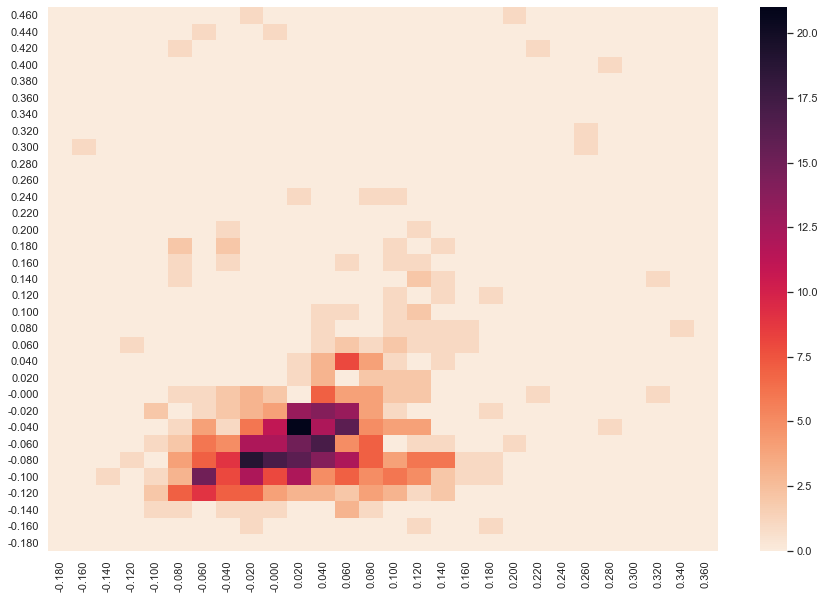

In [13]:
sns.set(rc={'figure.figsize': (15,10)})
sns.heatmap(np.flipud(np.swapaxes(hist,0,1)), xticklabels=mean_between_neighbors(xedge), yticklabels=np.flipud(mean_between_neighbors(yedge)), cmap="rocket_r")

# Spiralen

In [14]:
spirals = gen_spirals(hist, xedge, yedge, 0, 0)

## Definitionen

Zur besseren Verständlichkeit soll folgendes gelten:

- Norden (N) und Osten (E) sind die jeweiligen positiven Richtungen der x oder y Achse
- Süden (S) und Westen (W) sind die jeweiligen negativen Richtungen der x oder y Achse
- Die x Achse wird horizontal dargestellt, die Werte werden von niedrig/negativ (links) nach hoch/positiv (rechts) aufgetragen
- Die y Achse wird vertikal dargestellt, die Werte werden von niedrig/negativ (unten) nach hoch/positiv (oben) aufgetragen

## Analysis

In [15]:
analyse_spiral(spirals, hist)

direction.S turn.turn_left: 67376.0

direction.S turn.turn_right: 71906.0

direction.N turn.turn_left: 74564.0

direction.N turn.turn_right: 71054.0

direction.W turn.turn_left: 73834.0

direction.W turn.turn_right: 76936.0

direction.E turn.turn_left: 72054.0

direction.E turn.turn_right: 69596.0

Best result: 
direction.S turn.turn_left
67376.0
[[20 19 18 17 16]
 [21  6  5  4 15]
 [22  7  0  3 14]
 [23  8  1  2 13]
 [24  9 10 11 12]]


Das beste Ergebniss wird für eine Spirale erzielt, die linksdrehend und den y-Wert zuerst verringert.
Die Auswertung ergibt einen Wert von 67376 in diesem Fall.